In [1]:
require 'unsup';
require 'nn';
require 'image';
require 'optim';
require 'randomkit'
require 'ComplexAutoencoder/src/Cos';
require 'ComplexAutoencoder/src/Sin';
require 'ComplexAutoencoder/src/Atan2'

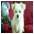

In [2]:
c10 = torch.load('ComplexAutoencoder/cifar10-train.t7')
itorch.image{c10.data[240], zoom=40}

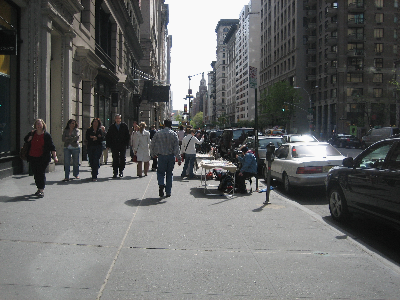

In [2]:
test = torch.load('ComplexAutoencoder/labelMe.dat')
itorch.image(test[1])

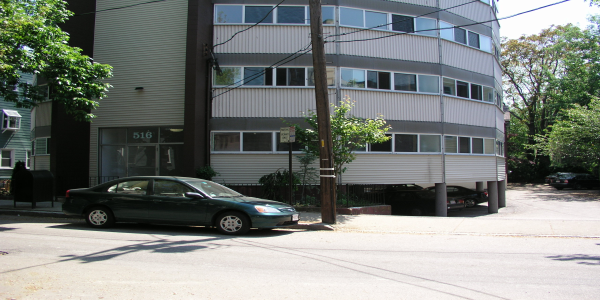

In [9]:
num = 1010735 + 5
img = image.load('/net/store/nbp/projects/phasesim/databases/LabelMeImages/05june05_static_street_boston/p'..num..'.jpg')
img = image.scale(img, 600, 300)
img = img:div(img:max())
itorch.image(img)


In [8]:
print(#img)

   3
 300
 400
[torch.LongStorage of size 3]



In [4]:
phase = torch.Tensor(#img):zero()
input = {torch.cmul(img,torch.cos(phase)),torch.cmul(img,torch.sin(phase))}
opt = {hidden = 3}

In [5]:
local transform = nn.ConcatTable()
x = nn.Sequential()
y = nn.Sequential()

local xpar = nn.ParallelTable()
local ypar = nn.ParallelTable()

xpar:add(nn.Cos())
xpar:add(nn.Identity())

ypar:add(nn.Sin())
ypar:add(nn.Identity())

x:add(xpar)
x:add(nn.CMulTable())

y:add(ypar)
y:add(nn.CMulTable())

transform:add(x)
transform:add(y)

stackedEnc = nn.Sequential()

stackedEncPar = nn.ParallelTable()
stackedEncSeq1 = nn.Sequential()
stackedEncSeq1:add(nn.Reshape(opt.hidden, 150, 2, 200, 2))
stackedEncSeq1:add(nn.View(opt.hidden,2,2,150,200))
stackedEncSeq1:add(nn.Reshape(opt.hidden*4,150,200))
stackedEncSeq2 = nn.Sequential()
stackedEncSeq2:add(nn.Reshape(opt.hidden, 150, 2, 200, 2))
stackedEncSeq2:add(nn.View(opt.hidden,2,2,150,200))
stackedEncSeq2:add(nn.Reshape(opt.hidden*4,150,200))
stackedEncPar:add(stackedEncSeq1)
stackedEncPar:add(stackedEncSeq2)

bla1=nn.ConcatTable():add(nn.Sequential():add(nn.ParallelTable():add(nn.Square()):add(nn.Square())):add(nn.CAddTable()):add(nn.Sqrt())):add(nn.Atan2())
stackedEnc:add(bla1)
stackedEnc:add(stackedEncPar)
stackedEnc:float()
stackedEnc:double()

stackedDec = nn.Sequential()

stackedDecPar = nn.ParallelTable()
stackedDecSeq1 = nn.Sequential()
stackedDecSeq1:add(nn.Reshape(opt.hidden,2,2,150,200))
stackedDecSeq1:add(nn.View(opt.hidden,150,2,200,2))
stackedDecSeq1:add(nn.Reshape(opt.hidden, 300, 400))
stackedDecSeq2 = nn.Sequential()
stackedDecSeq2:add(nn.Reshape(opt.hidden,2,2,150,200))
stackedDecSeq2:add(nn.View(opt.hidden,150,2,200,2))
stackedDecSeq2:add(nn.Reshape(opt.hidden, 300, 400))
stackedDecPar:add(stackedDecSeq1)
stackedDecPar:add(stackedDecSeq2)
bla2=nn.ConcatTable():add(nn.Sequential():add(nn.ParallelTable():add(nn.Square()):add(nn.Square())):add(nn.CAddTable()):add(nn.Sqrt())):add(nn.Atan2())
stackedDec:add(stackedDecPar)


In [6]:
test = stackedEnc:forward(input)
test2 = stackedDec:forward(test)
--print(bla1:forward(input)[1])
itorch.image(test[1])
itorch.image(test2)

--print(#stackedEnc:forward(img))

./ComplexAutoencoder/src/Atan2.lua:19: attempt to call method 'cuda' (a nil value)
stack traceback:
	./ComplexAutoencoder/src/Atan2.lua:19: in function 'updateOutput'
	...projects/phasesim/local/share/lua/5.1/nn/ConcatTable.lua:11: in function 'updateOutput'
	.../projects/phasesim/local/share/lua/5.1/nn/Sequential.lua:44: in function 'forward'
	[string "test = stackedEnc:forward(input)..."]:1: in main chunk
	[C]: in function 'xpcall'
	...bp/projects/phasesim/local/share/lua/5.1/itorch/main.lua:177: in function <...bp/projects/phasesim/local/share/lua/5.1/itorch/main.lua:143>
	...bp/projects/phasesim/local/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	...projects/phasesim/local/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	...projects/phasesim/local/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	...projects/phasesim/local/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	...bp/projects/phasesim/local/share/lua/5.1/itorch/main.lua:344: in main chunk
	[C]: in function 'require'
	[string "arg={'/net/home/student/k/kstandvoss/.ipython..."]:1: in main chunk: 

In [24]:
print(stackedDec:listModules())

{
  1 : 
    nn.Sequential {
      [input -> (1) -> (2) -> output]
      (1): nn.ConcatTable {
        input
          |`-> (1): nn.Sequential {
          |      [input -> (1) -> (2) -> (3) -> output]
          |      (1): nn.ParallelTable {
          |        input
          |          |`-> (1): nn.Square
          |          |`-> (2): nn.Square
          |           ... -> output
          |      }
          |      (2): nn.CAddTable
          |      (3): nn.Sqrt
          |    }
          |`-> (2): nn.Atan2
           ... -> output
      }
      (2): nn.ParallelTable {
        input
          |`-> (1): nn.Sequential {
          |      [input -> (1) -> (2) -> (3) -> output]
          |      (1): nn.Reshape(3x2x2x150x200)
          |      (2): nn.View
          |      (3): nn.Reshape(3x300x400)
          |    }
          |`-> (2): nn.Sequential {
          |      [input -> (1) -> (2) -> (3) -> output]
          |      (1): nn.Reshape(3x2x2x150x200)
          |      (2): nn.View
       

         |`-> (2): nn.Square
                   ... -> output
              }
              (2): nn.CAddTable
              (3): nn.Sqrt
            }
            {
              gradInput : table: 0x41d70930
              modules : 
                {
                  1 : nn.ParallelTable {
  input
    |`-> (1): nn.Square
    |`-> (2): nn.Square
     ... -> output
}
                  2 : nn.CAddTable
                  3 : nn.Sqrt
                }
              output : FloatTensor - empty
            }
          2 : 
            nn.Atan2
            {
              gradInput : FloatTensor - empty
              useCuda : true
              output : FloatTensor - empty
            }
        }
      output : table: 0x407351c8
    }
  3 : 
    nn.Sequential {
      [input -> (1) -> (2) -> (3) -> output]
      (1): nn.ParallelTable {
        input
          |`-> (1): nn.Square
          |`-> (2): nn.Square
           ... -> output
      }
      (2): nn.CAddTable
      (3): nn.Sqrt
    }
 

          }
          2 : 
            nn.Sequential {
              [input -> (1) -> (2) -> (3) -> output]
              (1): nn.Reshape(3x2x2x150x200)
              (2): nn.View
              (3): nn.Reshape(3x300x400)
            }
            {
              gradInput : FloatTensor - empty
              modules : 
                {
                  1 : nn.Reshape(3x2x2x150x200)
                  2 : nn.View
                  3 : nn.Reshape(3x300x400)
                }
              output : FloatTensor - empty
            }
        }
      output : table: 0x40227e58
    }
  11 : 
    nn.Sequential {
      [input -> (1) -> (2) -> (3) -> output]
      (1): nn.Reshape(3x2x2x150x200)
      (2): nn.View
      (3): nn.Reshape(3x300x400)
    }
    {
      gradInput : FloatTensor - empty
      modules : 
        {
          1 : 
            nn.Reshape(3x2x2x150x200)
            {
              nelement : 360000
              _input : FloatTensor - empty
              output : FloatTensor 

              nelement : 360000
              _input : FloatTensor - empty
              output : FloatTensor - empty
              gradInput : FloatTensor - empty
              size : LongStorage - size: 3
              _gradOutput : FloatTensor - empty
              batchsize : LongStorage - size: 4
            }
        }
      output : FloatTensor - empty
    }
  16 : 
    nn.Reshape(3x2x2x150x200)
    {
      nelement : 360000
      _input : FloatTensor - empty
      output : FloatTensor - empty
      gradInput : FloatTensor - empty
      size : LongStorage - size: 5
      _gradOutput : FloatTensor - empty
      batchsize : LongStorage - size: 6
    }
  17 : 
    nn.View
    {
      size : LongStorage - size: 5
      numElements : 360000
    }
  18 : 
    nn.Reshape(3x300x400)
    {
      nelement : 360000
      _input : FloatTensor - empty
      output : FloatTensor - empty
      gradInput : FloatTensor - empty
      size : LongStorage - size: 3
      _gradOutput : FloatTensor - 

In [19]:
a = torch.Tensor(3,300,400):fill(1)
b = torch.Tensor(#a):fill(1)
a_out = torch.sqrt(torch.pow(a,2) + torch.pow(b,2))  
test = torch.atan2(b,a)
print(#a_out)
print(#torch.sin(test))

   3
 300
 400
[torch.LongStorage of size 3]



   3
 300
 400
[torch.LongStorage of size 3]



In [1]:
require 'mattorch'

{
  load : function: 0x40a5c3f0
  saveAscii : function: 0x40a5dad0
  save : function: 0x40a5dab0
}


In [2]:
a = mattorch.load('/net/store/nbp/projects/phasesim/workdir/20130726_Paper/Autoencoder/labelMeWhite/05june05_static_street_boston/p1010737.jpg/act1.mat')

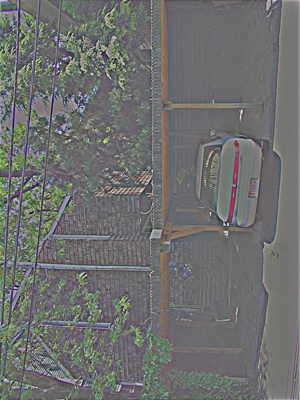

In [9]:
itorch.image(a['act'])

In [36]:


local errors = torch.Tensor(10,54)
for i = 1,10 do
  errors[i] = torch.load('ComplexAutoencoder/Data/Error' .. i .. '.dat')
end  
x = torch.range(1,54)--torch.linspace(0,54)


ymax = errors:max(1)
ymin = errors:min(1)

test = torch.cat(x,ymin[1],2)
test = torch.cat(test,ymax[1],2)

ymean = errors:mean()
gnuplot.plot({test, 'filledcurves'}, {x, ymax}, {x, ymin}, {x, ymean})

[string "..."]:17: bad argument #4 to 'sub' (out of range at /tmp/luarocks_torch-scm-1-9280/torch7/generic/Tensor.c:317)
stack traceback:
	[C]: in function 'sub'
	[string "..."]:17: in main chunk
	[C]: in function 'xpcall'
	...bp/projects/phasesim/local/share/lua/5.1/itorch/main.lua:177: in function <...bp/projects/phasesim/local/share/lua/5.1/itorch/main.lua:143>
	...bp/projects/phasesim/local/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	...projects/phasesim/local/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	...projects/phasesim/local/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	...projects/phasesim/local/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	...bp/projects/phasesim/local/share/lua/5.1/itorch/main.lua:344: in main chunk
	[C]: in function 'require'
	[string "arg={'/net/home/student/k/kstandvoss/.ipython..."]:1: in main chunk: 

 54
[torch.LongStorage of size 1]



In [11]:
x = torch.linspace(1,100)
y = torch.sin(x)
gnuplot.plot({'Sin',x,y},{'Cos',x,torch.cos(x)})